In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_against = pd.read_html('https://fbref.com/en/comps/10/shooting/Championship-Stats#all_stats_shooting_against', attrs = {"id" : "stats_squads_shooting_against"})[0]

In [3]:
df_against.columns = ['_'.join(col).strip() for col in df_against.columns.values]
df_against.columns = ['_'.join(col).strip() for col in df_against.columns.values]

In [4]:
df_against

,U_n_n_a_m_e_d_:_ _0___l_e_v_e_l___0___S_q_u_a_d,U_n_n_a_m_e_d_:_ _1___l_e_v_e_l___0___#_ _P_l,U_n_n_a_m_e_d_:_ _2___l_e_v_e_l___0___9_0_s,S_t_a_n_d_a_r_d___G_l_s,S_t_a_n_d_a_r_d___S_h,S_t_a_n_d_a_r_d___S_o_T,S_t_a_n_d_a_r_d___S_o_T_%,S_t_a_n_d_a_r_d___S_h_/_9_0,S_t_a_n_d_a_r_d___S_o_T_/_9_0,S_t_a_n_d_a_r_d___G_/_S_h,S_t_a_n_d_a_r_d___G_/_S_o_T,S_t_a_n_d_a_r_d___D_i_s_t,S_t_a_n_d_a_r_d___F_K,S_t_a_n_d_a_r_d___P_K,S_t_a_n_d_a_r_d___P_K_a_t_t,E_x_p_e_c_t_e_d___x_G,E_x_p_e_c_t_e_d___n_p_x_G,E_x_p_e_c_t_e_d___n_p_x_G_/_S_h,E_x_p_e_c_t_e_d___G_-_x_G,E_x_p_e_c_t_e_d___n_p_:_G_-_x_G
0,vs Birmingham City,30,44.0,62,603,209,34.7,13.70,4.75,0.10,0.30,17.1,22,0,0,59.3,59.3,0.10,2.7,2.7
1,vs Blackburn,31,44.0,71,645,214,33.2,14.66,4.86,0.10,0.31,17.5,19,4,6,63.4,58.7,0.09,7.6,8.3
2,vs Bristol City,25,44.0,45,532,174,32.7,12.09,3.95,0.08,0.24,17.4,11,4,5,52.1,48.2,0.09,-7.1,-7.2
3,vs Cardiff City,33,44.0,60,557,180,32.3,12.66,4.09,0.11,0.33,17.0,21,1,3,65.1,63.0,0.12,-5.1,-4.0
4,vs Coventry City,25,42.0,48,547,166,30.3,13.02,3.95,0.08,0.28,17.2,16,2,2,49.3,47.7,0.09,-1.3,-1.7
5,vs Huddersfield,33,44.0,72,585,195,33.3,13.30,4.43,0.12,0.35,17.4,14,3,4,60.0,56.9,0.10,12.0,12.1
6,vs Hull City,33,43.0,54,569,157,27.6,13.23,3.65,0.09,0.32,17.7,10,3,3,48.5,46.2,0.08,5.5,4.8
7,vs Ipswich Town,31,43.0,47,460,153,33.3,10.70,3.56,0.10,0.29,17.9,13,2,3,43.3,41.0,0.09,3.7,4.0
8,vs Leeds United,33,44.0,35,411,117,28.5,9.34,2.66,0.08,0.29,17.7,8,1,1,36.2,35.4,0.09,-1.2,-1.4
9,vs Leicester City,27,44.0,38,470,154,32.8,10.68,3.50,0.08,0.25,18.4,22,0,1,40.8,40.0,0.09,-2.8,-2.0


In [5]:
df_against.rename(columns = {'U_n_n_a_m_e_d_:_ _0___l_e_v_e_l___0___S_q_u_a_d':'Squad', 'S_t_a_n_d_a_r_d___S_h_/_9_0' : 'ShA/90','E_x_p_e_c_t_e_d___x_G':'xG','S_t_a_n_d_a_r_d___S_h':'Shots'},inplace=True)
df_against = df_against[['Squad', 'ShA/90', 'xG', 'Shots']]

In [6]:
df_against['Squad'] = df_against['Squad'].str.split('vs').str[1]

C:\Users\dmsta\AppData\Local\Temp\ipykernel_25312\2474473961.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_against['Squad'] = df_against['Squad'].str.split('vs').str[1]


In [7]:
df_against['Squad'] = df_against['Squad'].str.strip()

C:\Users\dmsta\AppData\Local\Temp\ipykernel_25312\1535084231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_against['Squad'] = df_against['Squad'].str.strip()


In [8]:
df = df_against
df['xG/Sh'] = df['xG'] / df['Shots']

C:\Users\dmsta\AppData\Local\Temp\ipykernel_25312\3851422276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xG/Sh'] = df['xG'] / df['Shots']


In [9]:
df['xG/Sh'] = df['xG/Sh'].round(3)
df = df[['Squad', 'xG/Sh', 'ShA/90']]

C:\Users\dmsta\AppData\Local\Temp\ipykernel_25312\2861972619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['xG/Sh'] = df['xG/Sh'].round(3)


In [10]:
df.rename(columns = {'Squad':'Team', 'ShA/90':'Sh/90 Against'},inplace=True)

C:\Users\dmsta\AppData\Local\Temp\ipykernel_25312\3402566905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Squad':'Team', 'ShA/90':'Sh/90 Against'},inplace=True)


In [11]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

C:\Users\dmsta\AppData\Local\Temp\ipykernel_25312\198423750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")


C:\Users\dmsta\AppData\Local\Temp\ipykernel_25312\914586330.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


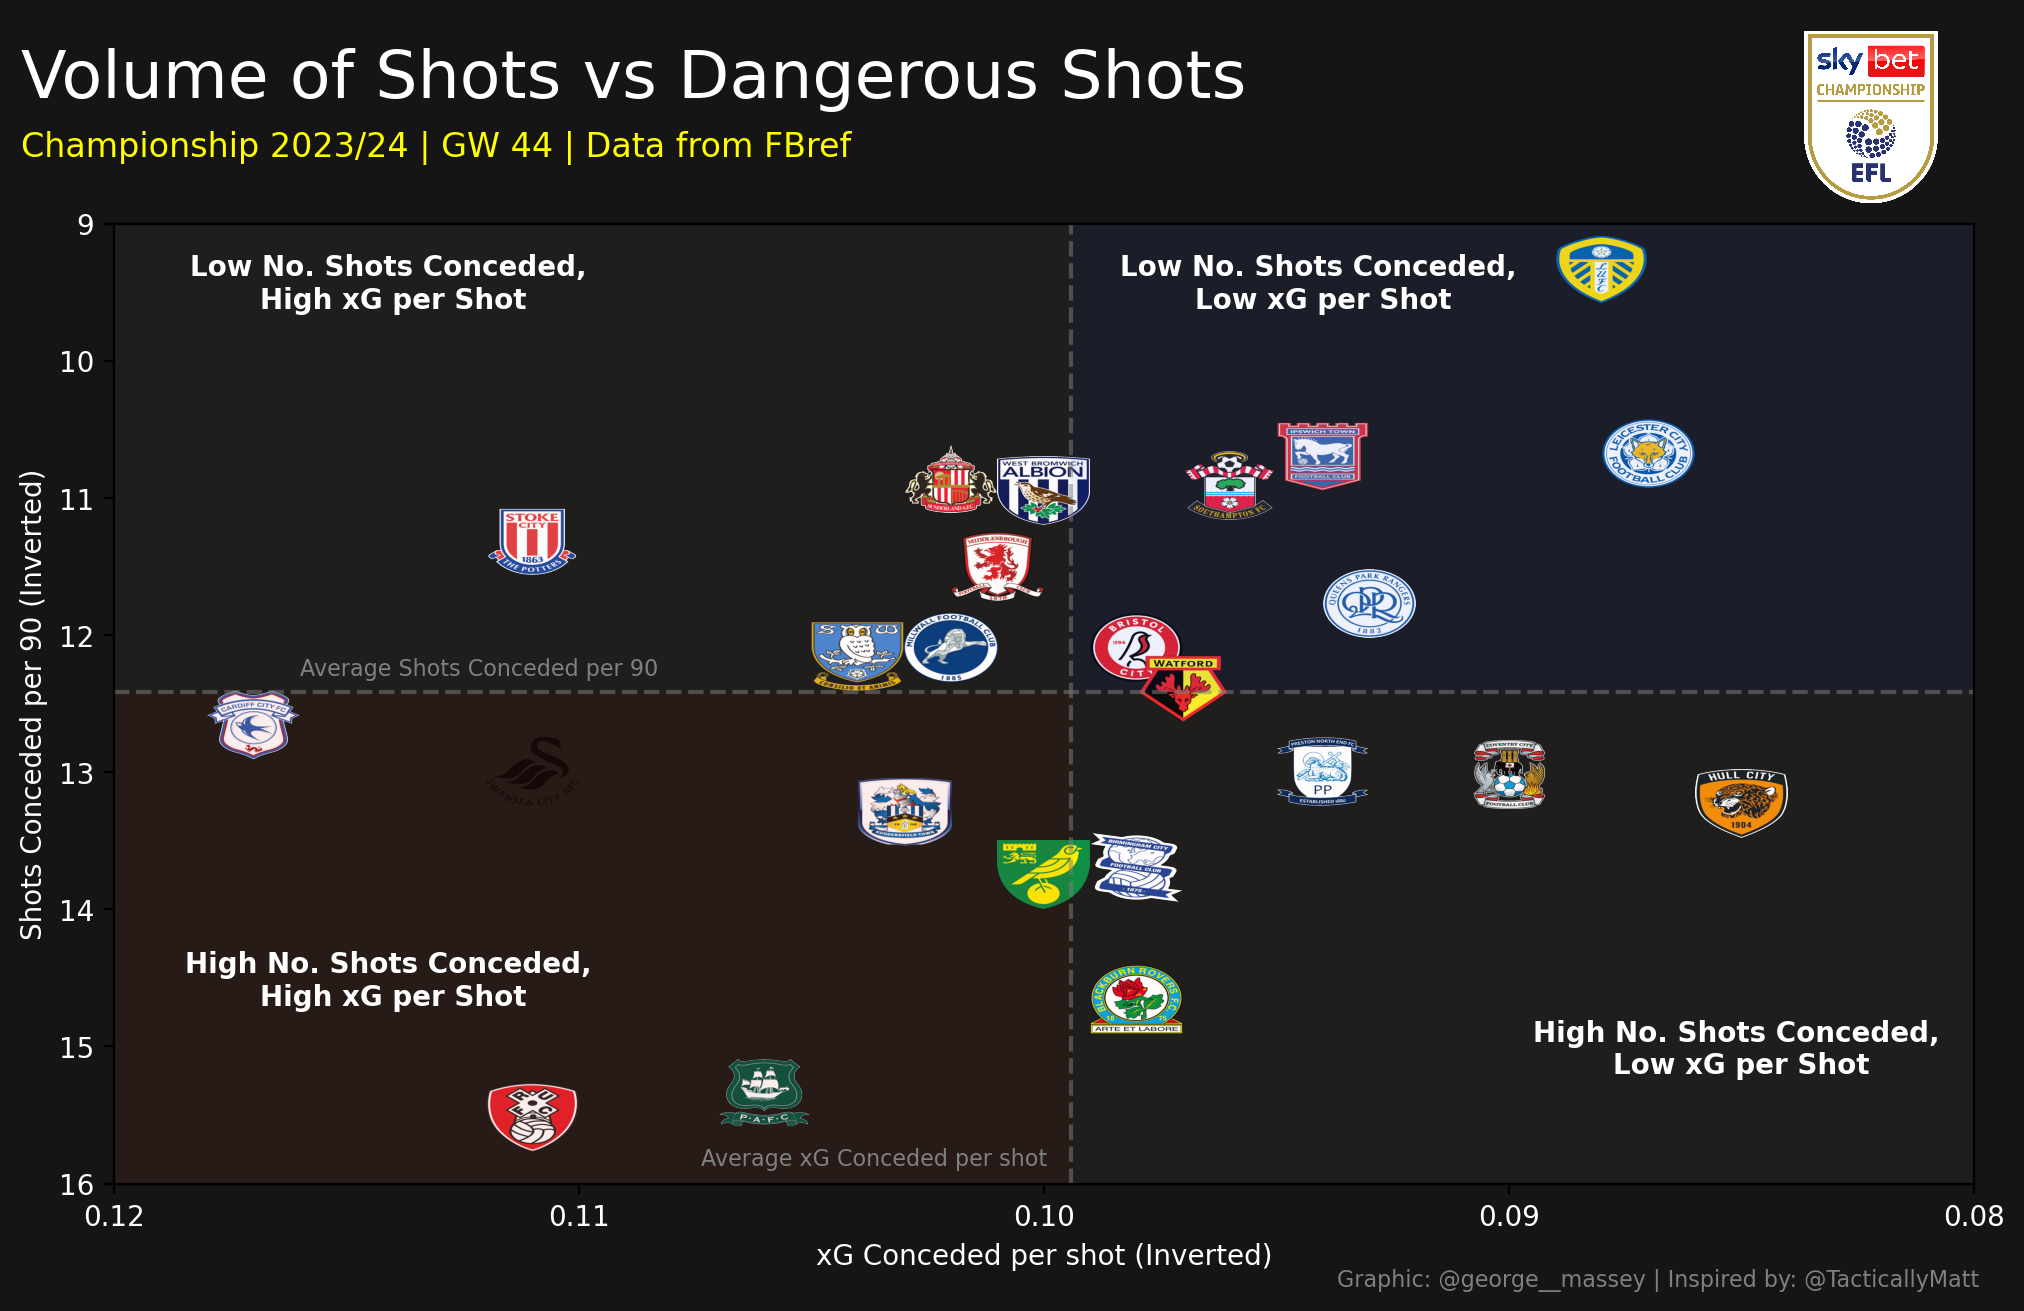

In [12]:
import matplotlib.patches as patches

plt.figure(figsize=(12, 8), dpi=200, facecolor='#141514')  # Set the facecolor to #141514

# Plot the badge at each point
for i, team in df.iterrows():
    badge = plt.imread(team['Badge'])
    badge = np.flipud(badge)
    plt.imshow(np.fliplr(badge), extent=(team['xG/Sh']-0.001, team['xG/Sh']+0.001, team['Sh/90 Against']-0.25, team['Sh/90 Against']+0.25), aspect='auto', origin='upper',alpha=1)

# Add labels and title
plt.xlabel('xG Conceded per shot (Inverted)', color='white')  # Set the xlabel color to white
plt.ylabel('Shots Conceded per 90 (Inverted)', color='white')  # Set the ylabel color to white
plt.yticks([9,10,11,12,13,14,15,16], color='white')  # Set the yticks color to white
plt.xticks([0.12,0.11,0.10,0.09,0.08], color='white')  # Set the xticks color to white
plt.gca().invert_yaxis() # Invert the x-axis
plt.gca().invert_xaxis() # Invert the y-axis
# Adjust the plot limits if needed
# Calculate the average value
average_value = df['Sh/90 Against'].mean()
average_value2 = df['xG/Sh'].mean()
# Draw a line from the y-axis at the average value
plt.axhline(average_value, color='grey', linestyle='--', alpha=0.5)
plt.axvline(average_value2, color='grey', linestyle='--', alpha=0.5)

# Set the colors for each quadrant
#colors = ['green', 'yellow', 'blue', 'red']
import matplotlib.cm as cm

# Set the colors for each quadrant using a colormap
cmap = cm.get_cmap('coolwarm')
colors = [cmap(0.1), cmap(0.3), cmap(0.6), cmap(0.9)]

# Create the rectangles
rect1 = patches.Rectangle((average_value2, average_value), width = df['xG/Sh'].max()+(0.1*df['xG/Sh'].max()), height=df['Sh/90 Against'].max(), facecolor=colors[3], alpha=0.1)
rect2 = patches.Rectangle((average_value2, 0), width=df['xG/Sh'].max()+(0.1*df['xG/Sh'].max()),height= average_value, facecolor=colors[2], alpha=0.05)
rect3 = patches.Rectangle((df['xG/Sh'].min()-(0.1*df['xG/Sh'].min()), average_value), average_value2 - (df['xG/Sh'].min()-(0.1*df['xG/Sh'].min())), height=df['Sh/90 Against'].max(), facecolor=colors[2], alpha=0.05)
rect4 = patches.Rectangle((df['xG/Sh'].min()-(0.1*df['xG/Sh'].min()), 0), width=average_value2 - (df['xG/Sh'].min()-(0.1*df['xG/Sh'].min())) , height=average_value, facecolor=colors[0], alpha=0.1)

# Add the rectangles to the plot
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)
#plt.xlim(df['xG/Sh'][::-1])
#plt.ylim(0, df['Sh/90 Against'].max()+50)

# Set the ticks color to white
plt.xticks(color='white')
plt.yticks(color='white')

# Set the plot background color to #141514
plt.gca().set_facecolor('#141514')
# Add text box in each quadrant
plt.text(df['xG/Sh'].min()+0.009, df['Sh/90 Against'].min()+0.1, 'Low No. Shots Conceded, \nLow xG per Shot', color='white', fontsize=10, weight='bold', va = 'center', ha = 'center')
plt.text(df['xG/Sh'].max()-0.003, df['Sh/90 Against'].min()+0.1,'Low No. Shots Conceded, \nHigh xG per Shot', color='white', fontsize=10, weight='bold', va = 'center', ha = 'center')
plt.text(df['xG/Sh'].max()-0.003, df['Sh/90 Against'].max()-1, 'High No. Shots Conceded, \nHigh xG per Shot', color='white', fontsize=10, weight='bold', va = 'center', ha = 'center')
plt.text(df['xG/Sh'].min(), df['Sh/90 Against'].max()-0.5, 'High No. Shots Conceded, \nLow xG per Shot', color='white', fontsize=10, weight='bold', va = 'center', ha = 'center')
plt.text(df['xG/Sh'].max()-(0.01*df['xG/Sh'].mean()),df['Sh/90 Against'].mean()-(0.01*df['Sh/90 Against'].mean()), 'Average Shots Conceded per 90', color='grey', fontsize=8)
plt.text(df['xG/Sh'].mean()+(0.08*df['xG/Sh'].mean()),df['Sh/90 Against'].max()+0.35, 'Average xG Conceded per shot', color='grey', fontsize=8)
plt.subplots_adjust(top=0.85, bottom=0.25)
plt.text(-0.05, 1.15, 'Volume of Shots vs Dangerous Shots', color='white', fontsize=24, transform=plt.gca().transAxes, ha='left', va='center')
plt.text(0.83, -0.1, 'Graphic: @george__massey | Inspired by: @TacticallyMatt', color='grey', fontsize=8, transform=plt.gca().transAxes, ha='center', va='center')
plt.text(-0.05, 1.08, 'Championship 2023/24 | GW 44 | Data from FBref', color='yellow', fontsize=12, transform=plt.gca().transAxes, ha='left', va='center')
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib as mpl

# Specify the backend to use (e.g., 'png', 'jpg', 'tiff')
#mpl.use('png')
# Load the image you want to add
logo_image = plt.imread("C:\\Users\\George\\Documents\\Football Analytics\\Images\\Championship_Logo.png")

# Create an OffsetImage instance with the loaded image
logo_offsetimage = OffsetImage(logo_image, zoom=0.04)  # Adjust the zoom value as needed

# Create an AnnotationBbox instance and add it to the plot
logo_box = AnnotationBbox(logo_offsetimage, (0.98, 1.2), xycoords='axes fraction', box_alignment=(1.0, 1.0), boxcoords="offset pixels")
ax = plt.gca()
ax.add_artist(logo_box)

# Make the box invisible, but keep the image visible
logo_box.patch.set_alpha(0)
plt.show()